In [ ]:
# Galaxy Multi-Image Classification with LeNet-5
# https://www.kaggle.com/code/tenzinmigmar/galaxy-multi-image-classification-with-lenet-5/notebook

# load with astroNN: astroNN is a python package to do various kinds of neural networks with targeted application in astronomy by using Keras API as model and training prototyping, but at the same time take advantage of Tensorflow’s flexibility.
# https://astronn.readthedocs.io/en/latest/galaxy10.html

# Importing Dependencies

'''
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup'''

'''
stuck at 
failed to import these two components on kaggle: 
from astroNN.datasets import galaxy10 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup
'''

# 由于环境问题无法导入astroNN包，决定在d盘创建虚拟环境再安装所需包。通过h5py,下载Galaxy10_DECals.h5来导入Galaxy10 DECals Dataset
# 创建虚拟环境：https://code.visualstudio.com/docs/python/environments

''' 
在命令行中，cd至目标文件夹下，运行python -m venv '目录名'，来创建虚拟环。创建完成后，目标文件夹下会生成子文件夹'目录名'
https://python-forum.io/thread-39414.html
'''

# check pip version and install packages in cmd. Activate the virtual environment in cmd: .\'venv_galaxyclas'\Scripts\activate.bat

import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

'''with h5py.File("D:/py/venv_galaxyclas/'venv_galaxyclas'/Lib/site-packages", 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])'''

## use / instead of \ in file path
## getting Permission denied error:
'''
{
	"name": "PermissionError",
	"message": "[Errno 13] Unable to synchronously open file (unable to open file: name = 'D:/py/venv_galaxyclas/'venv_galaxyclas'/Lib/site-packages', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0)",
	"stack": "\u001b[1;31m---------------------------------------------------------------------------\u001b[0m\n\u001b[1;31mPermissionError\u001b[0m                           Traceback (most recent call last)\nFile \u001b[1;32md:\\xy\\MyFiles\\GitLocal Repository\\wooo\\MyTools\\MyTools\\AI + CloudComputing\\HandsOn\\GalaxyClassification.py:65\u001b[0m\n\u001b[0;32m     62\u001b[0m \u001b[39mfrom\u001b[39;00m \u001b[39msklearn\u001b[39;00m\u001b[39m.\u001b[39;00m\u001b[39mmetrics\u001b[39;00m \u001b[39mimport\u001b[39;00m classification_report,confusion_matrix\n\u001b[0;32m     63\u001b[0m \u001b[39mfrom\u001b[39;00m \u001b[39mtensorflow\u001b[39;00m\u001b[39m.\u001b[39;00m\u001b[39mkeras\u001b[39;00m \u001b[39mimport\u001b[39;00m utils\n\u001b[1;32m---> 65\u001b[0m \u001b[39mwith\u001b[39;00m h5py\u001b[39m.\u001b[39;49mFile(\u001b[39m\"\u001b[39;49m\u001b[39mD:/py/venv_galaxyclas/\u001b[39;49m\u001b[39m'\u001b[39;49m\u001b[39mvenv_galaxyclas\u001b[39;49m\u001b[39m'\u001b[39;49m\u001b[39m/Lib/site-packages\u001b[39;49m\u001b[39m\"\u001b[39;49m, \u001b[39m'\u001b[39;49m\u001b[39mr\u001b[39;49m\u001b[39m'\u001b[39;49m) \u001b[39mas\u001b[39;00m F:\n\u001b[0;32m     66\u001b[0m     images \u001b[39m=\u001b[39m np\u001b[39m.\u001b[39marray(F[\u001b[39m'\u001b[39m\u001b[39mimages\u001b[39m\u001b[39m'\u001b[39m])\n\u001b[0;32m     67\u001b[0m     labels \u001b[39m=\u001b[39m np\u001b[39m.\u001b[39marray(F[\u001b[39m'\u001b[39m\u001b[39mans\u001b[39m\u001b[39m'\u001b[39m])\n\nFile \u001b[1;32md:\\py\\venv_galaxyclas\\'venv_galaxyclas'\\Lib\\site-packages\\h5py\\_hl\\files.py:562\u001b[0m, in \u001b[0;36mFile.__init__\u001b[1;34m(self, name, mode, driver, libver, userblock_size, swmr, rdcc_nslots, rdcc_nbytes, rdcc_w0, track_order, fs_strategy, fs_persist, fs_threshold, fs_page_size, page_buf_size, min_meta_keep, min_raw_keep, locking, alignment_threshold, alignment_interval, meta_block_size, **kwds)\u001b[0m\n\u001b[0;32m    553\u001b[0m     fapl \u001b[39m=\u001b[39m make_fapl(driver, libver, rdcc_nslots, rdcc_nbytes, rdcc_w0,\n\u001b[0;32m    554\u001b[0m                      locking, page_buf_size, min_meta_keep, min_raw_keep,\n\u001b[0;32m    555\u001b[0m                      alignment_threshold\u001b[39m=\u001b[39malignment_threshold,\n\u001b[0;32m    556\u001b[0m                      alignment_interval\u001b[39m=\u001b[39malignment_interval,\n\u001b[0;32m    557\u001b[0m                      meta_block_size\u001b[39m=\u001b[39mmeta_block_size,\n\u001b[0;32m    558\u001b[0m                      \u001b[39m*\u001b[39m\u001b[39m*\u001b[39mkwds)\n\u001b[0;32m    559\u001b[0m     fcpl \u001b[39m=\u001b[39m make_fcpl(track_order\u001b[39m=\u001b[39mtrack_order, fs_strategy\u001b[39m=\u001b[39mfs_strategy,\n\u001b[0;32m    560\u001b[0m                      fs_persist\u001b[39m=\u001b[39mfs_persist, fs_threshold\u001b[39m=\u001b[39mfs_threshold,\n\u001b[0;32m    561\u001b[0m                      fs_page_size\u001b[39m=\u001b[39mfs_page_size)\n\u001b[1;32m--> 562\u001b[0m     fid \u001b[39m=\u001b[39m make_fid(name, mode, userblock_size, fapl, fcpl, swmr\u001b[39m=\u001b[39;49mswmr)\n\u001b[0;32m    564\u001b[0m \u001b[39mif\u001b[39;00m \u001b[39misinstance\u001b[39m(libver, \u001b[39mtuple\u001b[39m):\n\u001b[0;32m    565\u001b[0m     \u001b[39mself\u001b[39m\u001b[39m.\u001b[39m_libver \u001b[39m=\u001b[39m libver\n\nFile \u001b[1;32md:\\py\\venv_galaxyclas\\'venv_galaxyclas'\\Lib\\site-packages\\h5py\\_hl\\files.py:235\u001b[0m, in \u001b[0;36mmake_fid\u001b[1;34m(name, mode, userblock_size, fapl, fcpl, swmr)\u001b[0m\n\u001b[0;32m    233\u001b[0m     \u001b[39mif\u001b[39;00m swmr \u001b[39mand\u001b[39;00m swmr_support:\n\u001b[0;32m    234\u001b[0m         flags \u001b[39m|\u001b[39m\u001b[39m=\u001b[39m h5f\u001b[39m.\u001b[39mACC_SWMR_READ\n\u001b[1;32m--> 235\u001b[0m     fid \u001b[39m=\u001b[39m h5f\u001b[39m.\u001b[39;49mopen(name, flags, fapl\u001b[39m=\u001b[39;49mfapl)\n\u001b[0;32m    236\u001b[0m \u001b[39melif\u001b[39;00m mode \u001b[39m==\u001b[39m \u001b[39m'\u001b[39m\u001b[39mr+\u001b[39m\u001b[39m'\u001b[39m:\n\u001b[0;32m    237\u001b[0m     fid \u001b[39m=\u001b[39m h5f\u001b[39m.\u001b[39mopen(name, h5f\u001b[39m.\u001b[39mACC_RDWR, fapl\u001b[39m=\u001b[39mfapl)\n\nFile \u001b[1;32mh5py\\\\_objects.pyx:54\u001b[0m, in \u001b[0;36mh5py._objects.with_phil.wrapper\u001b[1;34m()\u001b[0m\n\nFile \u001b[1;32mh5py\\\\_objects.pyx:55\u001b[0m, in \u001b[0;36mh5py._objects.with_phil.wrapper\u001b[1;34m()\u001b[0m\n\nFile \u001b[1;32mh5py\\\\h5f.pyx:102\u001b[0m, in \u001b[0;36mh5py.h5f.open\u001b[1;34m()\u001b[0m\n\n\u001b[1;31mPermissionError\u001b[0m: [Errno 13] Unable to synchronously open file (unable to open file: name = 'D:/py/venv_galaxyclas/'venv_galaxyclas'/Lib/site-packages', errno = 13, error message = 'Permission denied', flags = 0, o_flags = 0)"
}
'''

## 可恶 不读这个文件了
## installed astroNN
from astroNN.datasets import galaxy10 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

In [ ]:
images, labels = galaxy10.load_data()

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

Galaxy10_DECals.h5: 100%|█████████▉| 2.73G/2.74G [09:28<00:00, 4.66MB/s]    

Downloaded Galaxy10 successfully to C:\Users\yu.xi\.astroNN\datasets\Galaxy10_DECals.h5


Galaxy10_DECals.h5: 2.74GB [09:35, 4.75MB/s]                            


In [ ]:
x_train.shape, x_test.shape

((14188, 256, 256, 3), (3548, 256, 256, 3))

In [ ]:
len(features)

10

0
0    1081
1    1853
2    2645
3    2027
4     334
5    2043
6    1829
7    2628
8    1423
9    1873
Name: count, dtype: int64


<ipython-input-7-e52eb50f2e61>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


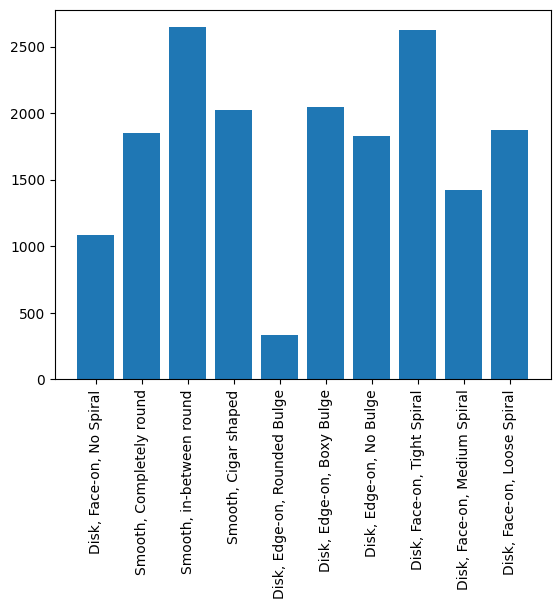

In [ ]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)